In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Project decription   

So we are an analysts at a big online store. Together with the marketing department, we've compiled a list of hypotheses that may help boost revenue.
We going to do our work by following 3 steps:   

**1. We'll prioritize these hypotheses at first**    
**2. After that we'll launch an A/B test, by plotting graphs of cumulative data, definding borders of "normal data" and definding statistical significance of the difference in conversion and average order size between the groups in raw and filtered data.**   
**3. And the last one - we'll analyze the results.**   

## Part 1: Prioritizing Hypotheses

Ok, let's proceed to our data and at first let's decide how we should prioritize hypotheses

In [2]:
try:
    data = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
except:
    print('Try another database')

In [3]:
data

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
data['ICE'] = (data['Impact'] * data['Confidence']) / data['Effort']
data.sort_values(by = 'ICE', ascending = False)[['Hypothesis', 'ICE']]

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [5]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Effort']
data.sort_values(by = 'RICE', ascending = False)[['Hypothesis','RICE']]

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [6]:
data.loc[7, 'Hypothesis']

'Add a subscription form to all the main pages. This will help you compile a mailing list'

**Conclusion:**   
While we are using ICE Score there are 3 hypotheses that we would pay attention to: with indices 8, 0 and 7. 
But after we've added the **"REACH"** parameter, the hypothesis with 7th index received the most point, almost x2 gap with second one. That means having significant level affected users make huge impact on order of hypothesis

## Part 2: A/B Test Analysis

Ok, let's retrive the data

In [7]:
try:
    orders = pd.read_csv('/datasets/orders_us.csv')
except:
    print('Try another database')

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [10]:
try:
    visits = pd.read_csv('/datasets/visits_us.csv')
except:
    print('Try another database')

In [11]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


So, we see that we have two groups, "A" and "B", where "A" group - it's control group, and "B" - the test one. Let's change the type of "date" column

In [13]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [14]:
visits['date'] = pd.to_datetime(visits['date'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


To compare two groups, we'll obtain cumulative data. We'll group both tables by date, count values and merge them after that

In [15]:
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [16]:
ordersAggregated = datesGroups.apply(lambda x : orders[np.logical_and(orders['date'] <= x['date'],
                                                                     orders['group'] == x['group'])]
                                    .agg({'date' : 'max', 
                                          'group' : 'max',
                                          'transactionId': pd.Series.nunique,
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue': 'sum'}), axis=1).sort_values(by = ['date', 'group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


In [17]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date']<=x['date'], visits['group']==x['group'])]
                                     .agg({'date': 'max', 
                                            'group': 'max', 
                                            'visits': 'sum'}), axis = 1).sort_values(by = ['date', 'group'])
visitsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [18]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = [
    'date',
    'group',
    'transactions',
    'buyers',
    'revenue', 
    'visits'
]
cumulativeData.head()

,date,group,transactions,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


### Graph cumulative revenue by group

Let's create DataFrames with cumulative revenue by day for each group and plot the graph

In [19]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'transactions']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'transactions']]

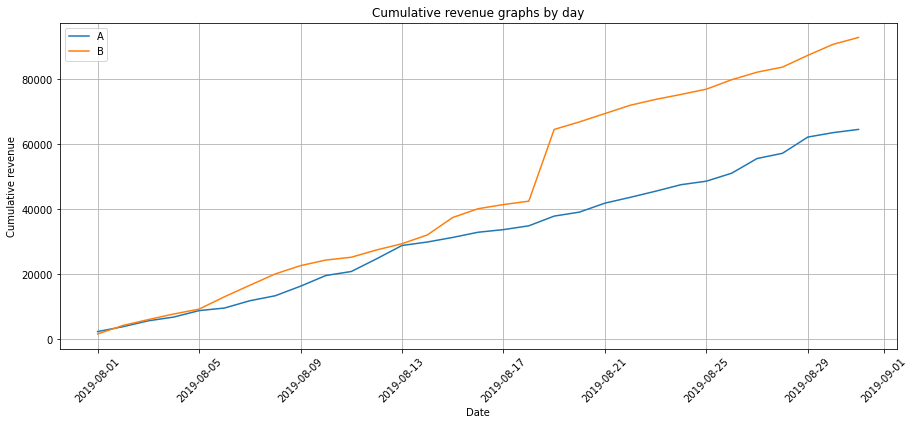

In [20]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B');
plt.grid()
plt.title('Cumulative revenue graphs by day');
plt.xlabel('Date');
plt.ylabel('Cumulative revenue');
plt.xticks(rotation=45);
plt.legend();

**Conclusion:**   

As we can see revenue is rising steadily throughout the whole test. But for test group we may see first of all almost the same result at the beginning of test, smooth gap between 5th and 13th August for "B" group, and obvious peak in 19th August (that might be kind of order with huge check, we don't know), and after that graph stabilize during the rest period of test  

### Graph cumulative average order size by group

Let's plot a graph of average order. To do so we'll divide revenue by number of transactions.

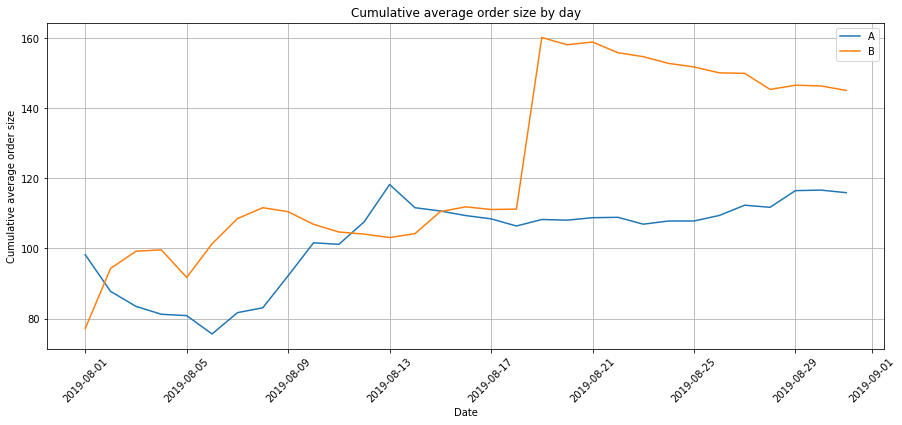

In [21]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], label = 'A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], label = 'B');
plt.grid()
plt.title('Cumulative average order size by day');
plt.xlabel('Date');
plt.ylabel('Cumulative average order size');
plt.xticks(rotation=45);
plt.legend();

**Conclusion:**     

The graph tells us about similar situation: at the beginning of test the test group has kind of gap with control group from 2th August to 10th August, after that the control group has small peak on 13th August, and obvious surge for test group in 19th August. Graph stabilize during the rest period of test, but for test group keeps on falling. 

### Graph relative difference in cumulative average order size for group B compared with group A.

First, let's merge two cumulative revenue tables

In [22]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', 
                                                  suffixes = ['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,transactionsA,revenueB,transactionsB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101


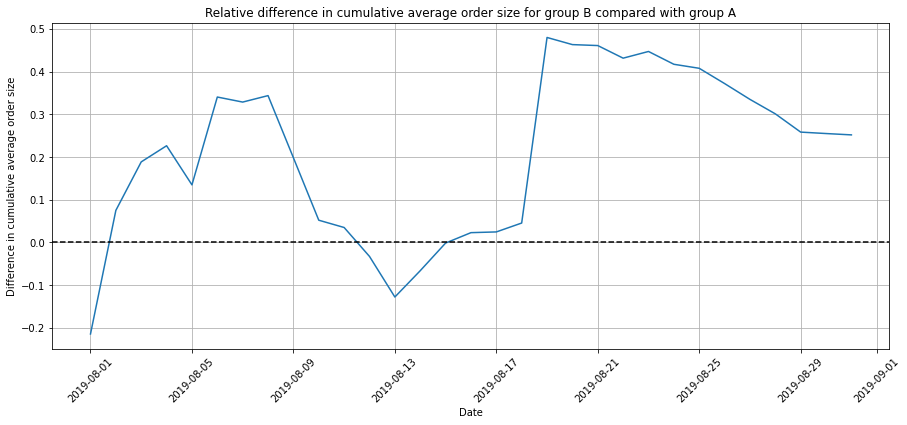

In [23]:
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB']) 
         / (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA']) -1);
plt.axhline(y = 0, color = 'black', linestyle = '--');
plt.grid();
plt.xticks(rotation=45);
plt.title('Relative difference in cumulative average order size for group B compared with group A');
plt.xlabel('Date');
plt.ylabel('Difference in cumulative average order size');

**Conclusion:**   

And again there are couple of spikes between two groups at the several points  

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference.

Let's add a new column for our cumulative table

In [24]:
cumulativeData['conversion'] = cumulativeData['transactions'] / cumulativeData['visits']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

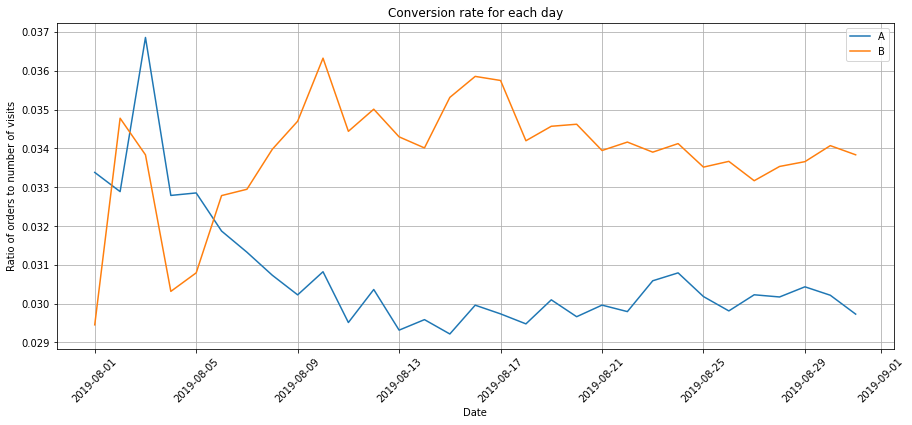

In [25]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataA['date'], cumulativeDataB['conversion'], label = 'B')
plt.grid();
plt.xticks(rotation=45);
plt.title('Conversion rate for each day');
plt.xlabel('Date');
plt.ylabel('Ratio of orders to number of visits');
plt.legend();

**Conclusion:**   

So, in the graph we see that until the 6th August control group conversion rate is better, they intersect on 6th of August and test group has higher rate after. The entire graph varies a lot at the beginning of the test and less at the remaining period. Both groups have the same trend, and varies almost in the same direction. 

In [26]:
mergedCumConv = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], 
                                                              left_on = 'date', right_on = 'date', 
                                                             how = 'left', suffixes = ['A', 'B'])
mergedCumConv.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


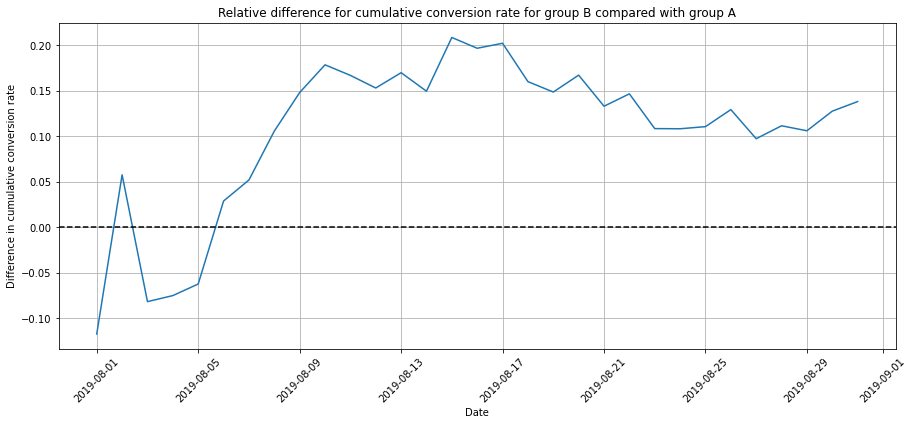

In [27]:
plt.plot(mergedCumConv['date'], mergedCumConv['conversionB'] / mergedCumConv['conversionA'] - 1);
plt.axhline(y = 0, color = 'black', linestyle = '--');
plt.grid();
plt.xticks(rotation=45);
plt.title('Relative difference for cumulative conversion rate for group B compared with group A');
plt.xlabel('Date');
plt.ylabel('Difference in cumulative conversion rate');

As we see, group "B" has an obvious gap through the major part of the test: stable rising from 6th August to peak on 15th August, and trend on decline after. 

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

First, let's create DataFrame grouped by visitors and number of orders 

In [28]:
ordersByUser = (orders.drop(['date', 'revenue', 'group'], axis = 1)
                .groupby('visitorId', as_index = False)
                .agg({'transactionId': pd.Series.nunique}))
ordersByUser.columns = ['visitorId', 'orders']
ordersByUser.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


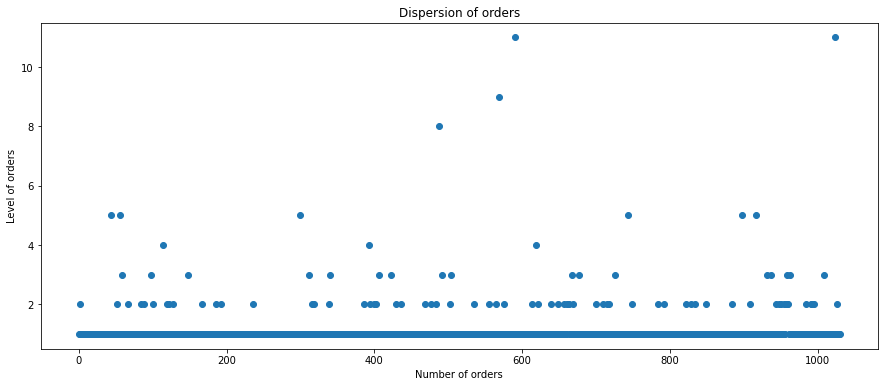

In [49]:
x_values = pd.Series(range(0, len(ordersByUser)))
plt.scatter(x_values, ordersByUser['orders']);
plt.title('Dispersion of orders');
plt.xlabel('Number of orders');
plt.ylabel('Level of orders');

**Conclusion:**   

On the graph we see that there are a pretty large number of users with two or more orders. It's not obvious from which level of orders we can consider that they are anomalies, we'll determine that in the future. 

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [30]:
print(np.percentile(ordersByUser['orders'], [95, 99]))

[2. 4.]


**Conclusion:**   

Ok, not more than 1% of users made 4 orders, and not more 5% made just 2 orders. Let's consider that users with more than 2 orders will be outliers. 

### Plot a scatter chart of order prices. Make conclusions and conjectures.

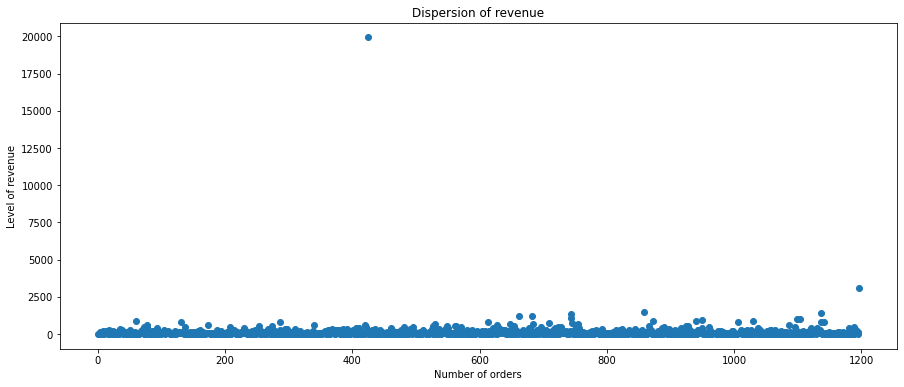

In [31]:
x_values_prices = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values_prices, orders['revenue']);
plt.title('Dispersion of revenue');
plt.xlabel('Number of orders');
plt.ylabel('Level of revenue');

**Conclusion:**   

Graph tells us that there is just one order with a huge check (20000), and most orders were placed with check less than 1000. 

### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [32]:
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


**Conclusion:**   

Less than 1% orders - 900 dollars, less than 5% - 435 dollars. Let's consider that orders with check more than 450 dollars - outliers

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

For finding statistical significance we'll use the Mann-Whitney U test. We'll create two samples from subDataFrames, "sample A" and "sample B" where we pass users from different groups and corresponding numbers of orders.

In [33]:
ordersByUserA = orders[orders['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId': pd.Series.nunique})
ordersByUserA.columns = ['visitorId', 'orders']
ordersByUserA.head()

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [34]:
ordersByUserB = orders[orders['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId': pd.Series.nunique})
ordersByUserB.columns = ['visitorId', 'orders']
ordersByUserB.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [35]:
sampleA = pd.concat([ordersByUserA['orders'], 
                    pd.Series(0, index = np.arange(visits[visits['group'] == 'A']
                                                   ['visits'].sum() - len(ordersByUserA['orders'])), 
                              name = 'orders')], axis = 0)
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [36]:
sampleB = pd.concat([ordersByUserB['orders'],
                    pd.Series(0, index = np.arange(visits[visits['group'] == 'B']
                                                  ['visits'].sum() - len(ordersByUserB['orders'])),
                             name = 'orders')], axis = 0)
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

**After reviewer's comment:**   

We'll declare hypotheses in the following way:   
1. H0 (Null): **There is NO statistically significant difference between the two groups**    

2. H1 (Alternative): **Yes, statistically significant difference exists**

In [37]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.017
0.138


**Conclusion:**   

It's look like test group better than control. The raw data show us that we can reject Null hypothesis, groups conversion rates have statistically significant differences. The relative conversion gain for group B compared with group A is 13,8 %. 

### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

In [38]:
revenueA = orders[orders['group'] == 'A']['revenue']
revenueB = orders[orders['group'] == 'B']['revenue']

**After reviewer's comment:**   

We'll declare hypotheses in the following way:   
1. H0 (Null): **There is NO statistically significant difference between the two groups**    

2. H1 (Alternative): **Yes, statistically significant difference exists**

In [39]:
print("{0:.3f}".format(stats.mannwhitneyu(revenueA, revenueB)[1]))
print("{0:.3f}".format(revenueB.mean()/revenueA.mean()-1))

0.692
0.252


**Conclusion:**   

P-value is significantly greater than 0.05, so there are no statistically significant differences between the group's average orders sizes. But the in the same time the relative difference is more than 25 %. 

### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

First, we'll define a list of "abnormal users", who placed more than 2 orders or with check more than 450. 

In [40]:
usersWithManyOrders = pd.concat([ordersByUserA[ordersByUserA['orders'] > 2]['visitorId'], 
                                ordersByUserB[ordersByUserB['orders'] > 2]['visitorId']], axis = 0)

In [41]:
usersWithBigOrders = orders[orders['revenue'] > 450]['visitorId']

In [42]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithBigOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head()

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

Now, let's retrieve samples with filtered data

In [43]:
sampleAfil = pd.concat(
    [ordersByUserA[np.logical_not(ordersByUserA['visitorId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visits[visits['group']=='A']
                                  ['visits'].sum() - len(ordersByUserA['orders'])), name='orders')], axis=0)

In [44]:
sampleBfil = pd.concat(
    [ordersByUserB[np.logical_not(ordersByUserB['visitorId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visits[visits['group']=='B']
                                  ['visits'].sum() - len(ordersByUserB['orders'])), name='orders')], axis=0)

**After reviewer's comment:**   

We'll declare hypotheses in the following way:   
1. H0 (Null): **There is NO statistically significant difference between the two groups**    

2. H1 (Alternative): **Yes, statistically significant difference exists**

In [45]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAfil, sampleBfil)[1]))
print("{0:.3f}".format(sampleBfil.mean()/sampleAfil.mean()-1))

0.013
0.172


**Conclusion:**

We see almost the same result with raw data: the p-value lower than alpha value, so we can reject Null hypothesis and declare that there are statistical significance between control and test group. The relative difference increased, now it's 17.2% in terms of conversion, we can conclude that after filtering data the values became better. 

### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [46]:
revenueAfil = orders[np.logical_and(orders['group'] == 'A', 
                                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

In [47]:
revenueBfil = orders[np.logical_and(orders['group'] == 'B', 
                                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

**After reviewer's comment:**   

We'll declare hypotheses in the following way:   
1. H0 (Null): **There is NO statistically significant difference between the two groups**    

2. H1 (Alternative): **Yes, statistically significant difference exists**

In [48]:
print("{0:.3f}".format(stats.mannwhitneyu(revenueAfil, revenueBfil)[1]))
print("{0:.3f}".format(revenueBfil.mean()/revenueAfil.mean()-1))

0.776
-0.021


**Conclusion:**   

After we've got rid of anomalies the indicators changed: p-value significantly increased, so there is no reason to reject the null hypothesis and conclude that average order size differs between the groups. Moreover, difference getting worse, values for group "B" smaller on 2% compared group "A".

### Make a decision based on the test results

**The possible decisions are:**   
1. Stop the test, consider one of the groups the leader.   
2. Stop the test, conclude that there is no difference between the groups.   
3. Continue the test. 

Based on cumulative metrics we can conclude that test group behaves itself better compared with control group: conversion rate shows how significant group "B" differs after week of the test how higher it is. Nonetheless, we can't confidently declare that average check or revenue increased because of one order more than 20000 dollars, that shift values of cumulative revenue and average order size in the second part of test.   
Both A/B tests (with "dirty" and "clean" data) show that there is statistical significance between control and test group in terms of conversion and the difference little bit increased (on 3.4%). But in terms of average order size, we didn't retrieve statistical significance between two groups, moreover after filtering data we obtain small relative loss, 2%.    
I would like recommend assume to stop the test and consider that he's successful: group "B" has better indicators of conversion with almost the same average check, so our hypothesis was true.